In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
import networkx as nx
import time
import json
import ngram

In [3]:
import importlib
importlib.reload(ngram)

<module 'ngram' from '/home/jurka/Dropbox/School/Hello There/DP/Python Scripts/ngram/ngram.py'>

In [4]:
# Empirical data entries...not really that good.
# Database of Ionic Radii: http://abulafia.mt.ic.ac.uk/shannon/ptable.php
# Why these coordinations?
# Coordination IV
R_O = 1.35
#
# Coordination VI
R_Al = 0.535
R_Ga = 0.62
R_In = 0.8
#
R_ions = { "O" : R_O, "Al" : R_Al, "Ga" : R_Ga, "In" : R_In }

In [5]:
lattice_vector_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/lattice.csv")
atoms_frac_xyz_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/frac.csv")
atoms_xyz_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/xyz.csv")
df_egy = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/energy.csv")
general = pd.read_csv("/home/jurka/research-project/train/relaxation/general.csv")
df_force = pd.read_csv("/home/jurka/research-project/train/additional/forces.csv")

In [ ]:
lattice_vector_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/lattice_vector_relaxation.csv")
atoms_frac_xyz_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/atoms_frac_xyz_relaxation.csv")
atoms_xyz_relaxation = pd.read_csv("/home/jurka/research-project/train/relaxation/atoms_xyz_relaxation.csv")
general = pd.read_csv("/home/jurka/research-project/train/relaxation/general.csv")

In [6]:
print(ngram.lattmat(lattice_vector_relaxation,1,0))
print()
print(ngram.posvecs(atoms_xyz_relaxation,2,3))

[[ 9.94875826e+00  2.00657400e-02  1.42749700e-02]
 [-2.39884700e-02  8.56774383e+00 -4.54460000e-04]
 [-1.28773300e-02 -3.89754800e-02  9.17645875e+00]]

[[ 2.04960900e-02 -1.56686200e-02  5.87946123e+00]
 [ 3.24834700e-02 -3.81459900e-02  1.77154234e+01]
 [ 4.63714316e+00  2.67908300e+00  5.87298017e+00]
 [ 4.67165752e+00  2.64140114e+00  1.77220051e+01]
 [ 3.09976256e+00 -1.18017300e-02  5.87057140e+00]
 [ 3.14533457e+00 -3.39056100e-02  1.77108309e+01]
 [ 1.55948232e+00  2.68850599e+00  5.89501533e+00]
 [ 1.58356272e+00  2.66107316e+00  1.77133849e+01]
 [ 3.91445000e-03 -3.41036000e-03 -4.41836100e-02]
 [ 2.24836000e-02 -1.35959000e-02  1.18639783e+01]
 [ 4.62344194e+00  2.68236906e+00 -4.95484300e-02]
 [ 4.66316260e+00  2.65106717e+00  1.18614866e+01]
 [ 3.10391473e+00  5.08281000e-03 -5.05319100e-02]
 [ 3.13448178e+00 -1.28022200e-02  1.18541344e+01]
 [ 1.54996029e+00  2.70749183e+00 -5.63895600e-02]
 [ 1.58277462e+00  2.68332777e+00  1.18810444e+01]
 [-1.34479300e-02  1.78470663

In [157]:
# Test the functions:
start = time.time()
material = ngram.init_material(atoms_frac_xyz_relaxation,lattice_vector_relaxation,5,0)
mdm = material.distance_matrix
end = time.time()
print("Elapsed time:", end - start,"s")

Elapsed time: 0.02646923065185547 s


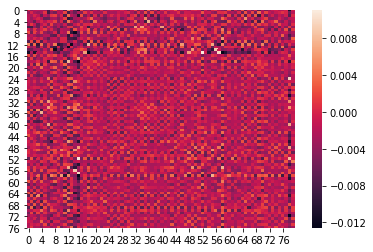

In [193]:
sns.heatmap(np.log(1+mdm))

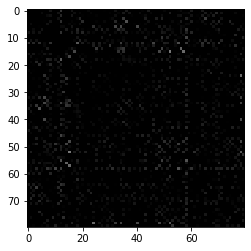

In [187]:
mdm = ngram.init_material(atoms_frac_xyz_relaxation,lattice_vector_relaxation,2,3).distance_matrix - ngram.init_material(atoms_frac_xyz_relaxation,lattice_vector_relaxation,2,4).distance_matrix
hypar=1.5
x = np.round(255*mdm/(np.max(mdm)-np.min(mdm)))
plt.imshow(x, cmap='gray', vmin=0, vmax=255)

/home/jurka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/home/jurka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/jurka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


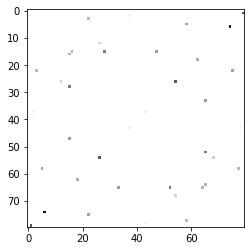

In [163]:
real = np.log(np.fft.fftshift(np.fft.fft2(x)).real)
imag = np.log(np.fft.fftshift(np.fft.fft2(x)).imag)
phase = np.arctan(imag/real)
length = np.abs(np.fft.fftshift(np.fft.fft2(x)))
plt.imshow(length, cmap='gray', vmin=0, vmax=255)
#plt.imshow(phase, cmap='gray', vmin=0, vmax=255)

In [164]:
count=0
for j in range(phase.shape[0]):
    for i in range(phase.shape[0]):
        if phase[i,j]>0.9:
            count+=1
    print(count)
    count=0
print(count)

3
4
0
1
1
0
3
2
0
2
1
3
0
2
3
0
2
0
3
1
1
4
3
1
2
1
5
1
0
1
3
1
3
0
2
4
3
3
1
1
1
2
2
4
2
0
1
1
1
5
0
1
1
2
0
4
2
4
5
2
3
3
0
1
4
2
2
1
3
3
5
4
5
1
1
2
5
0
1
2
0


In [138]:
G = ngram.gen_graph(material,"metal_oxygen_cons", 1.5)

print("Node count:", G.number_of_nodes())
print("Edge count:", G.number_of_edges())

Node count: 30
Edge count: 72


In [ ]:
coordination = []
nei = ngram.get_neighbors(G)
for i in nei.keys():
    coordination.append((i, len(nei[i])))
print(coordination)

In [ ]:
sorted(dict(G.nodes.items()).keys(), key=lambda x: int(x.split()[1]))

In [ ]:
list(G.neighbors("Ga 0"))

In [ ]:
list(G["Ga 0"])

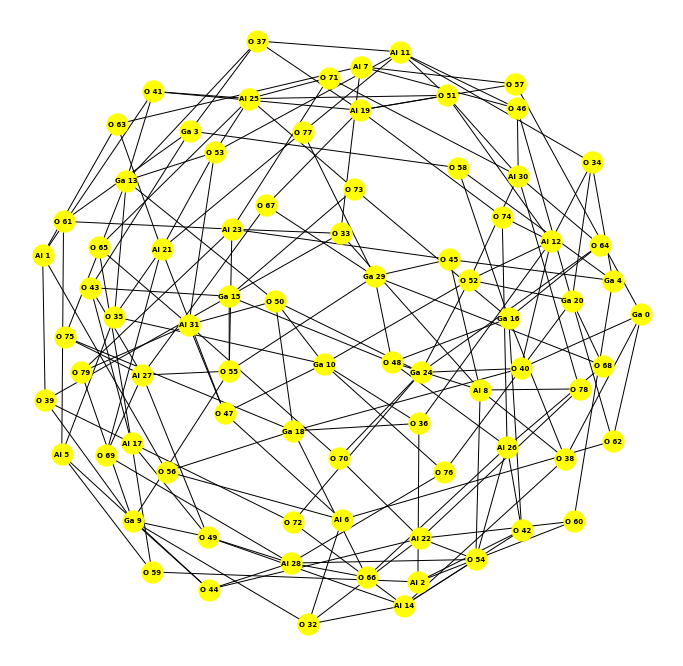

In [13]:
plt.figure(figsize=(12,12)) 
nx.draw_networkx_labels(G, pos=nx.kamada_kawai_layout(G), font_size=7, font_color="black", font_weight="bold")
nx.draw_kamada_kawai(G, with_labels=False, node_size=450,node_color='yellow')
# Nice!
#plt.savefig("id1rsn0graph.png",dpi=300)

[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [4 4 0 ... 0 0 0]
 ...
 [5 3 5 ... 0 0 0]
 [3 5 3 ... 4 0 0]
 [5 3 5 ... 4 4 0]]


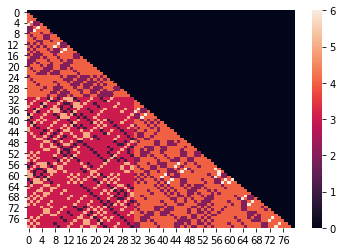

In [14]:
plm = ngram.get_hood(G)
print(plm)
sns.heatmap(ngram.get_hood(G))

In [4]:
def matrix_coding(mat):
    """Optimizing the need storage space for lower triangular matrix without a diagonal.
    Returns a vector containing concatenated sequences of rows
    starting from the second row and without the diagonal.
    
    Keyword arguments:
    mat -- input matrix
    """
    dim = mat.shape
    assert dim[0] == dim[1], "Error: The matrix is not a square matrix."
    vec = []
    diag_val = mat[0,0]
    vec.append(diag_val)
    for i in range(dim[0]):
        for j in range(i):
            vec.append(mat[i,j])
    return vec

In [16]:
print("Matrix dims:", plm.shape)
vec = matrix_coding(plm)
print("Length of vec:", len(vec))

Matrix dims: (80, 80)
Length of vec: 3161


In [17]:
len(vec) == (plm.shape[0]**2 - plm.shape[0])*.5 + 1

True

In [18]:
n = .5*(1 + np.sqrt(8*len(vec)-7))
print(int(n))

80


In [5]:
def matrix_decoding(vec):
    """Making a lower triangular matrix with the same value on the whole diagonal.
    Returns a numpy array.
    Keyword arguments:
    vec -- python list of numbers (output of matrix_coding)
    """
    dim = int(.5*(1 + np.sqrt(8*len(vec)-7))) # square matrix dimensions
    #print(dim)
    diag_val = vec[0]
    mat = np.diag(np.zeros(dim))
    n = 0
    for i in range(dim):
        for j in range(i):
            n += 1
            mat[i,j] = vec[n]
    return mat

# Loading .json

In [6]:
with open('/home/jurka/Desktop/distances_train_no_supercell.json') as jsonfile:
    mat = json.load(jsonfile)

In [58]:
for i in count:
    if df_dummy.loc[df_dummy["id"]==i]["species"].to_list()==['Ga', 'Al', 'Ga', 'In', 'O', 'O', 'O', 'O', 'O', 'O']:
        print(i)

1984


In [59]:
len(lattice_vector_relaxation.loc[lattice_vector_relaxation["id"]==1984]["relaxation_step_number"].to_list())

26

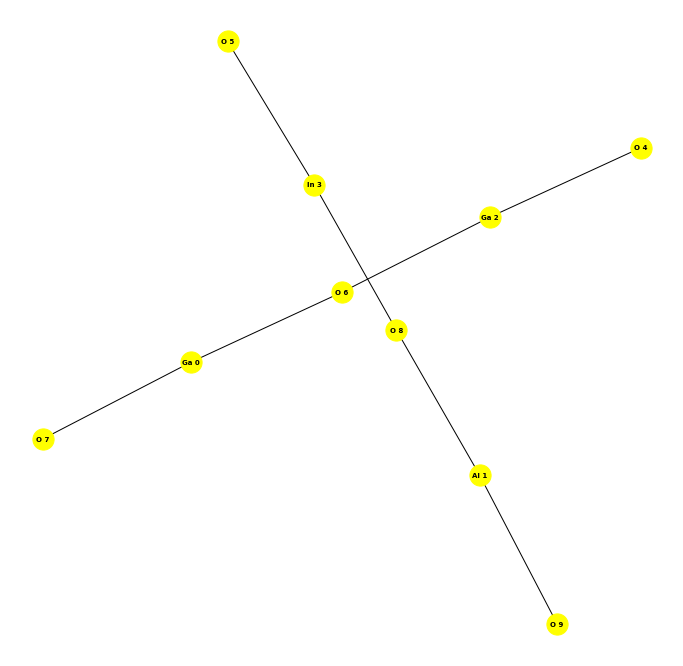

In [32]:
mdm, sv = ngram.minimal_distance(atoms_frac_xyz_relaxation,lattice_vector_relaxation,1984,24)
G = ngram.gengraph(mdm, sv, R_ions, hypar=1.5)
plt.figure(figsize=(12,12)) 
nx.draw_networkx_labels(G, pos=nx.kamada_kawai_layout(G), font_size=7, font_color="black", font_weight="bold")
nx.draw_kamada_kawai(G, with_labels=False, node_size=450,node_color='yellow')

In [6]:
mdm, sv = ngram.minimal_distance(atoms_frac_xyz_relaxation,lattice_vector_relaxation,1,0)

In [65]:
print(ngram.gengraph.__doc__)

Generates the crystal graph.
    
    Keyword arguments:
    minimal_distance_matrix -- matrix of minimal distances
    species_vector -- the names of the atoms in the unit cell
    ionic_radii -- dictionary of ionic radii for the atoms spicies
    hypar -- hyperparameter which tunes the decision distances, default value is 1.5
    


# pymatgen

In [10]:
from pymatgen import symmetry as sym
from pymatgen import core as core

In [ ]:
df_latt = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeros/lattice_vector_relaxation_with_zeros.csv")
df_frac = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeros/atoms_frac_xyz_with_zeros.csv")
df_xyz = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeros/atoms_xyz_with_zeros.csv")
df_general = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeros/general.csv")

In [7]:
df_latt = pd.read_csv("/home/jurka/research-project/train/relaxation/lattice_vector_relaxation.csv")
df_frac = pd.read_csv("/home/jurka/research-project/train/relaxation/atoms_frac_xyz_relaxation.csv")
df_xyz = pd.read_csv("/home/jurka/research-project/train/relaxation/atoms_xyz_relaxation.csv")
df_general = pd.read_csv("/home/jurka/research-project/train/relaxation/general.csv")

In [265]:
#Vegard
df_general = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeros/general.csv")
df_latt = pd.read_csv("/home/jurka/research-project/train/start/lattice_vector_vegard.csv")
df_frac = pd.read_csv("/home/jurka/research-project/train/start/atoms_frac_xyz_vegard.csv")
df_xyz = pd.read_csv("/home/jurka/research-project/train/start/atoms_xyz_vegard.csv")

In [11]:
count=0
for ajdi in df_general["id"].values:
    for rsn in df_latt.relaxation_step_number.values[df_latt["id"]==ajdi]:
        lattice = np.transpose(ngram.lattmat(df_latt,ajdi,rsn)) # pymatgen compatible lattice vector
        species = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)].species.values
        coords = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)][df_frac.columns[-3:]].values

        SpacegroupAnalyzer = sym.analyzer.SpacegroupAnalyzer
i
        Structure = core.IStructure

        material = Structure(lattice=lattice, species=species, coords=coords, to_unit_cell=True, coords_are_cartesian=False)

        spacegroup = SpacegroupAnalyzer(material,symprec=0.1,angle_tolerance=8.0).get_space_group_number()
        #if spacegroup == df_general[df_general["id"]==ajdi].spacegroup.to_list()[0]:
        print("spacegroup of ajdi",ajdi,":",spacegroup, " " ,df_general[df_general["id"]==ajdi].spacegroup.to_list(), "Real spacegroup")
        count+=1
print(count)
# 23 for symprec=0.1
# 23 for symprec=0.01
# 23 for symprec=0.2
# 

spacegroup of ajdi 1 : 1   [33] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 2 : 1   [194] Real spacegroup
spacegroup of ajdi 3 : 1   [227] Real spacegroup
spacegroup of ajdi 3 : 1   [227] Real spacegroup
spacegroup of ajdi 3 : 1   [227] Real spacegroup
spacegroup of ajdi 3 

KeyboardInterrupt: 

In [13]:
SpacegroupAnalyzer = sym.analyzer.SpacegroupAnalyzer

Structure = core.IStructure

lattice = np.transpose(ngram.lattmat(df_latt,ajdi,rsn)) # pymatgen compatible lattice vector
species = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)].species.values
coords = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)][df_frac.columns[-3:]].values

material = Structure(lattice=lattice, species=species, coords=coords, to_unit_cell=True, coords_are_cartesian=False)

spacegroup = SpacegroupAnalyzer(material).get_space_group_number()

In [44]:
count = set()
for ajdi in df_general.id.values:
    for rsn in df_latt[df_latt["id"]==ajdi].relaxation_step_number.values:
        
        lattice = np.transpose(ngram.lattmat(df_latt,ajdi,rsn)) # pymatgen compatible lattice vector
        species = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)].species.values
        coords = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)][df_frac.columns[-3:]].values

        material = Structure(lattice=lattice, species=species, coords=coords, to_unit_cell=True, coords_are_cartesian=False)
        
        test_mat = matrix_decoding(mat[str(ajdi)][str(rsn)])

        test_mat = test_mat + np.transpose(test_mat)

        test_mat = np.transpose(test_mat)

        if not (np.abs(material.distance_matrix - test_mat) < 1e-14).all():
            #print(ajdi, rsn, df_general[df_general["id"]==ajdi].spacegroup.values[0])
            count.add(ajdi)


In [48]:
for ajdi in [276, 688, 1204, 821, 2002]:
    for rsn in df_latt[df_latt["id"]==ajdi].relaxation_step_number.values:
        mdm, sv = ngram.minimal_distance(df_frac,df_latt,ajdi,rsn)
        #mdm = np.transpose(mdm + np.transpose(mdm))
        mdm = np.transpose(mdm) + mdm
        lattice = np.transpose(ngram.lattmat(df_latt,ajdi,rsn)) # pymatgen compatible lattice vector
        species = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)].species.values
        coords = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)][df_frac.columns[-3:]].values

        material = Structure(lattice=lattice, species=species, coords=coords, to_unit_cell=True, coords_are_cartesian=False)
        if not (np.abs(mdm-material.distance_matrix) < 1e-12).all():
            print(ajdi, rsn, df_general[df_general["id"]==ajdi].spacegroup.values[0])
        

In [57]:
lattice = np.transpose(ngram.lattmat(df_latt,ajdi,rsn)) # pymatgen compatible lattice vector
species = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)].species.values
coords = df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)][df_frac.columns[-3:]].values
material = Structure(lattice=lattice, species=species, coords=coords, to_unit_cell=True, coords_are_cartesian=False)
print(material.distance_matrix)

[[ 0.          3.00999924 12.45472771 ...  6.15285527  7.26310476
   7.66363549]
 [ 3.00999924  0.         12.85472628 ...  5.27667656  7.9124775
   7.05626405]
 [12.45472771 12.85472628  0.         ...  8.05282196  5.20588364
   6.26687924]
 ...
 [ 6.15285527  5.27667656  8.05282196 ...  0.         12.93156369
  12.3115899 ]
 [ 7.26310476  7.9124775   5.20588364 ... 12.93156369  0.
   3.12901001]
 [ 7.66363549  7.05626405  6.26687924 ... 12.3115899   3.12901001
   0.        ]]


In [121]:
material.types_of_specie[0].data["Shannon radii"]["-2"]["II"]

{'II': {'': {'crystal_radius': 1.21, 'ionic_radius': 1.35}},
 'III': {'': {'crystal_radius': 1.22, 'ionic_radius': 1.36}},
 'IV': {'': {'crystal_radius': 1.24, 'ionic_radius': 1.38}},
 'VI': {'': {'crystal_radius': 1.26, 'ionic_radius': 1.4}},
 'VIII': {'': {'crystal_radius': 1.28, 'ionic_radius': 1.42}}}

In [ ]:
# Empirical data entries...not really that good.
# Database of Ionic Radii: http://abulafia.mt.ic.ac.uk/shannon/ptable.php
# Why these coordinations?
# Coordination IV
R_O = 1.35 # shouldnt it be 1.38?
#
# Coordination VI
R_Al = 0.535
R_Ga = 0.62
R_In = 0.8
#
R_ions = { "O" : R_O, "Al" : R_Al, "Ga" : R_Ga, "In" : R_In }

In [129]:
core.Element.O.data["Shannon radii"]["-2"]["II"][""]["ionic_radius"]

1.35

In [132]:
core.Element.In.data["Shannon radii"]["3"]["VI"][""]["ionic_radius"]

0.8

In [133]:
core.Element.In.data["Shannon radii"]

{'3': {'IV': {'': {'crystal_radius': 0.76, 'ionic_radius': 0.62}},
  'VI': {'': {'crystal_radius': 0.94, 'ionic_radius': 0.8}},
  'VIII': {'': {'crystal_radius': 1.06, 'ionic_radius': 0.92}}}}

In [183]:
[str(atom) for atom in material.species] == df_frac[(df_frac["id"]==ajdi) & (df_frac["relaxation_step_number"]==rsn)].species.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
material = ngram.init_material(df_frac, df_latt, ajdi, rsn)

In [370]:
G = ngram.gen_graph(material, "metal_oxygen_cons", hypar=1.5)

In [357]:
ngram.get_coordinations(G)

{'In 0': 5,
 'Al 1': 4,
 'Al 2': 4,
 'Al 3': 4,
 'Al 4': 4,
 'Al 5': 4,
 'Ga 6': 4,
 'Al 7': 4,
 'Al 8': 4,
 'Al 9': 4,
 'Ga 10': 4,
 'Ga 11': 4,
 'Al 12': 4,
 'Ga 13': 4,
 'Al 14': 4,
 'Al 15': 4,
 'In 16': 6,
 'Al 17': 6,
 'In 18': 6,
 'Ga 19': 6,
 'In 20': 6,
 'In 21': 6,
 'Ga 22': 6,
 'Al 23': 6,
 'In 24': 6,
 'Ga 25': 6,
 'Ga 26': 6,
 'In 27': 6,
 'Al 28': 6,
 'Ga 29': 6,
 'Al 30': 6,
 'In 31': 6,
 'O 32': 4,
 'O 33': 4,
 'O 34': 4,
 'O 35': 4,
 'O 36': 4,
 'O 37': 4,
 'O 38': 4,
 'O 39': 4,
 'O 40': 4,
 'O 41': 4,
 'O 42': 4,
 'O 43': 4,
 'O 44': 4,
 'O 45': 4,
 'O 46': 4,
 'O 47': 4,
 'O 48': 3,
 'O 49': 3,
 'O 50': 3,
 'O 51': 3,
 'O 52': 3,
 'O 53': 3,
 'O 54': 4,
 'O 55': 3,
 'O 56': 3,
 'O 57': 3,
 'O 58': 3,
 'O 59': 3,
 'O 60': 3,
 'O 61': 3,
 'O 62': 3,
 'O 63': 3,
 'O 64': 3,
 'O 65': 3,
 'O 66': 3,
 'O 67': 3,
 'O 68': 3,
 'O 69': 3,
 'O 70': 3,
 'O 71': 3,
 'O 72': 3,
 'O 73': 3,
 'O 74': 3,
 'O 75': 3,
 'O 76': 3,
 'O 77': 3,
 'O 78': 3,
 'O 79': 3}

In [358]:
ngram.get_neighbors(G)

{'In 0': ['O 32', 'O 48', 'O 54', 'O 68', 'O 69'],
 'Al 1': ['O 33', 'O 49', 'O 68', 'O 69'],
 'Al 2': ['O 34', 'O 50', 'O 70', 'O 71'],
 'Al 3': ['O 35', 'O 51', 'O 70', 'O 71'],
 'Al 4': ['O 36', 'O 52', 'O 64', 'O 65'],
 'Al 5': ['O 37', 'O 53', 'O 64', 'O 65'],
 'Ga 6': ['O 38', 'O 54', 'O 66', 'O 67'],
 'Al 7': ['O 39', 'O 55', 'O 66', 'O 67'],
 'Al 8': ['O 40', 'O 56', 'O 76', 'O 77'],
 'Al 9': ['O 41', 'O 57', 'O 76', 'O 77'],
 'Ga 10': ['O 42', 'O 58', 'O 78', 'O 79'],
 'Ga 11': ['O 43', 'O 59', 'O 78', 'O 79'],
 'Al 12': ['O 44', 'O 60', 'O 72', 'O 73'],
 'Ga 13': ['O 45', 'O 61', 'O 72', 'O 73'],
 'Al 14': ['O 46', 'O 62', 'O 74', 'O 75'],
 'Al 15': ['O 47', 'O 63', 'O 74', 'O 75'],
 'In 16': ['O 32', 'O 33', 'O 44', 'O 48', 'O 49', 'O 66'],
 'Al 17': ['O 32', 'O 33', 'O 45', 'O 48', 'O 49', 'O 67'],
 'In 18': ['O 34', 'O 35', 'O 46', 'O 50', 'O 51', 'O 64'],
 'Ga 19': ['O 34', 'O 35', 'O 47', 'O 50', 'O 51', 'O 65'],
 'In 20': ['O 36', 'O 37', 'O 40', 'O 52', 'O 53', 'O 70']

In [375]:
nx.get_edge_attributes(G,'distance')

{('O 32', 'In 0'): 2.04728156551366,
 ('O 32', 'In 16'): 2.2243108766475035,
 ('O 32', 'Al 17'): 1.982997643246754,
 ('O 32', 'Al 28'): 1.959467719625512,
 ('In 0', 'O 48'): 2.0076437067764394,
 ('In 0', 'O 54'): 3.12776435762639,
 ('In 0', 'O 68'): 2.033050159249207,
 ('In 0', 'O 69'): 2.0246082450104237,
 ('In 16', 'O 33'): 2.2395415098047633,
 ('In 16', 'O 44'): 2.1958679039051567,
 ('In 16', 'O 48'): 2.1080535636353823,
 ('In 16', 'O 49'): 2.1452798639961683,
 ('In 16', 'O 66'): 2.137910614261539,
 ('Al 17', 'O 33'): 2.0462735062141038,
 ('Al 17', 'O 45'): 1.9847959366835708,
 ('Al 17', 'O 48'): 1.8480786610456066,
 ('Al 17', 'O 49'): 1.9182683632308934,
 ('Al 17', 'O 67'): 1.9812189538414482,
 ('Al 28', 'O 44'): 2.067856377958411,
 ('Al 28', 'O 45'): 2.117860197666435,
 ('Al 28', 'O 60'): 1.9511371464195122,
 ('Al 28', 'O 61'): 1.9031560838444166,
 ('Al 28', 'O 76'): 1.9463071058742525,
 ('O 33', 'Al 1'): 1.8323398753023001,
 ('O 33', 'Ga 29'): 2.0914831995545304,
 ('Al 1', 'O 49'

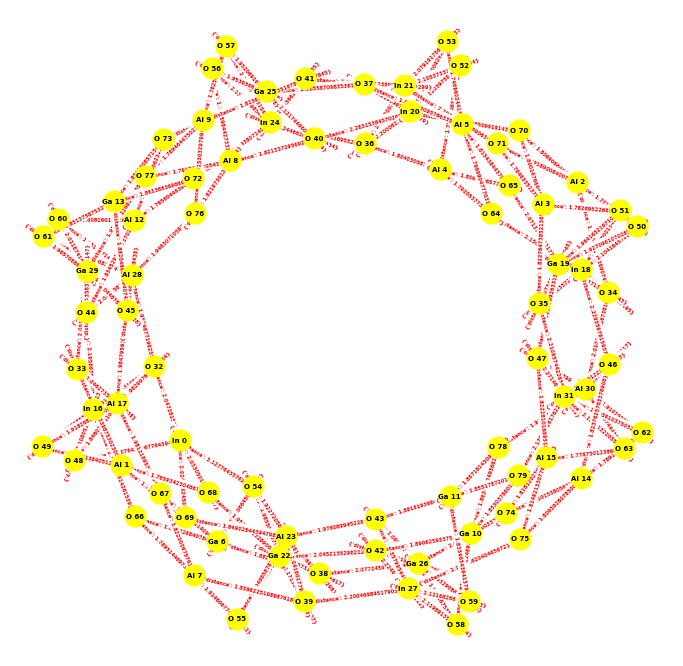

In [377]:
plt.figure(figsize=(12,12)) 
nx.draw_networkx_labels(G, pos=nx.kamada_kawai_layout(G), font_size=7, font_color="black", font_weight="bold")
edge_labels = nx.get_edge_attributes(G,'distance')
nx.draw_networkx_edge_labels(G, pos=nx.kamada_kawai_layout(G), labels=edge_labels, font_size=5, font_color="red", font_weight="bold")
nx.draw_kamada_kawai(G, with_labels=False, node_size=450,node_color='yellow')